K-means clustering is a popular unsupervised machine learning algorithm used for grouping data into clusters. The algorithm aims to partition a dataset into K distinct non-overlapping clusters, where each data point belongs to the cluster with the nearest mean value. The number of clusters, K, needs to be specified in advance. In this case clusters are created for two features, Opiod Deaths per 10,000 and Opiod Sales per 10,000.

In [32]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None


Connect to SQLite database


In [63]:
conn = sqlite3.connect('data/opiods.db')

# join deaths and sales table, query for just MN and Oxycododone
query = "SELECT deaths.Fips, deaths.Location, deaths.[TimeFrame], deaths.[Drug Type], " \
        "deaths.Data as OpiodDeaths, sales.Data as OxycodoneSales " \
        "FROM deaths " \
        "INNER JOIN sales ON sales.Fips = deaths.Fips and sales.TimeFrame = deaths.TimeFrame " \
        "WHERE [Drug Type] = 'All opioids' " \
        "AND [Oxycodone / Hydrocodone] = 'Oxycodone' " \
        "ORDER BY deaths.Location, deaths.TimeFrame"

# load into df
df = pd.read_sql_query(query, conn)


# Close the connection
conn.close()
df.head()


,Fips,Location,TimeFrame,Drug Type,OpiodDeaths,OxycodoneSales
0,1,Alabama,2000,All opioids,0.98993,6.74399
1,1,Alabama,2001,All opioids,1.29709,7.79399
2,1,Alabama,2002,All opioids,1.61198,7.80123
3,1,Alabama,2003,All opioids,1.10769,9.26128
4,1,Alabama,2004,All opioids,1.84700,9.10411


In [ ]:
# fill Nans and creat features
df = df.fillna(0)
X = df[["OpiodDeaths","OxycodoneSales"]]
X.head()

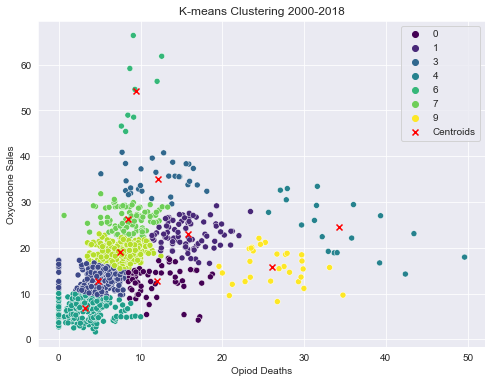

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_style("darkgrid")

# Assuming you have already loaded the data into a DataFrame called 'df'
def kmeans():
# Select the features for clustering
    features = ['OpiodDeaths', 'OxycodoneSales']
    X = df[features]

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Add the cluster labels to the DataFrame
    X['Cluster'] = labels

    # Set the figure size
    plt.figure(figsize=(8, 6))
    sns.set_style("darkgrid")

    # Plot the clusters
    sns.scatterplot(x='OpiodDeaths', y='OxycodoneSales', hue='Cluster', data=X, palette='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
    plt.xlabel('Opiod Deaths')
    plt.ylabel('Oxycodone Sales')
    plt.title('K-means Clustering 2000-2018')
    plt.legend()
    #plt.show()
    
    return plt.show()


kmeans()


In [68]:
# query for subset of years
df_2018 = df.query("TimeFrame == 2018 or TimeFrame == 2017 or TimeFrame == 2016")
df_2018.head()


,Fips,Location,TimeFrame,Drug Type,OpiodDeaths,OxycodoneSales
16,1,Alabama,2016,All opioids,7.48004,22.23861
17,1,Alabama,2017,All opioids,9.04533,19.31574
18,1,Alabama,2018,All opioids,8.27228,16.63208
35,2,Alaska,2016,All opioids,12.50671,21.16648
36,2,Alaska,2017,All opioids,13.87398,19.39345


Just for 2016-2018

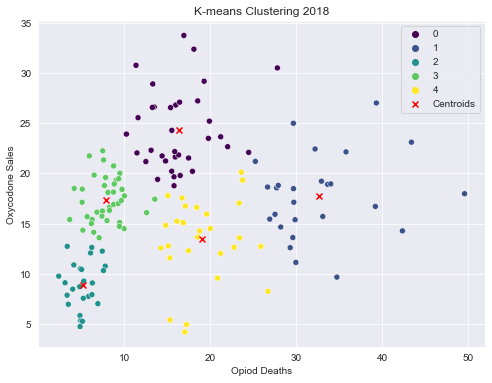

In [66]:
# Assuming you have already loaded the data into a DataFrame called 'df'
def kmeans_three_years():
    # Select the features for clustering

    df_2018 = df.query("TimeFrame == 2018 or TimeFrame == 2017 or TimeFrame == 2016")
    features = ['OpiodDeaths', 'OxycodoneSales']
    X = df_2018[features]

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(X)

    # Get the cluster labels
    labels = kmeans.labels_

    # Add the cluster labels to the DataFrame
    X['Cluster'] = labels

    # Set the figure size
    plt.figure(figsize=(8, 6))

    # Plot the clusters
    sns.scatterplot(x='OpiodDeaths', y='OxycodoneSales', hue='Cluster', data=X, palette='viridis')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
    plt.xlabel('Opiod Deaths')
    plt.ylabel('Oxycodone Sales')
    plt.title('K-means Clustering 2018')
    plt.legend()
    #plt.show()
    
    return plt.show()


kmeans_18()
